#The Titanic Survival Dataset

<h1>About the Dataset</h1>
<p>The dataset contains the details of the people boarded on Titanic for the unfortunate day. There are two dataset - Train.csv and Test.csv
<ul>
<li><b>train.csv:</b> This dataset is only for building the model. For training set the outcoume("Ground truth") is provided. The model will be based on features like passengers gender and class.</li>
<li><b>test.csv:</b> This dataset is only for testing purposes of our model. For test set the outcome("Ground truth") is not provided. For each passenger in the test set, it is the model's job to predict whether or not they survived the sinking of the Titanic.</li>
</ul>
</P>
<h3>Data Dictionary</h3>
<ul>
  <li><b>Survived:</b> Survival [0=no, 1=yes]</li>
  <li><b>Pclass:</b> Ticket class [1=1st, 2=2nd, 3=3rd]</li>
  <li><b>Sex:</b> Gender [male, female]</li>
  <li><b>Age:</b> Age in years</li>
  <li><b>SibSp:</b> No. of siblings/spouses aboard the Titanic</li>
  <li><b>Parch:</b> No. of parents aboard the Titanic</li>
  <li><b>Ticket:</b> Ticket number</li>
  <li><b>Fare:</b> Ticket fare</li>
  <li><b>Cabin:</b> Cabin number</li>
  <li><b>Embarked:</b> Port of Embarktion [C=Cherbourg, Q=Queentown, S=Southampton]</li>
</ul>
<h3>Variable Notes</h3>
<ul>
  <li><b>Pclass:</b> A proxy for socio-economic status (SES)<br/>1st= Upper<br/>2nd= Middle<br/>3rd= Lower</li>
  <li><b>Age:</b> Age is fractional if less than 1. If age is estimated, it is in the form of xx.5</li>
  <li><b>SibSp:</b> The dataset defines family relations in this way...<br/>Sibling = brother, sister, stepbrother, stepsister<br/>Spouse = husband, wife (mistresses and fiancés were ignored)</li>
  <li><b>Parch:</b> The dataset defines family relations in this way...<br/>Parent = mother, father<br/>Child = daughter, son, stepdaughter, stepson<br/>Some children travelled only with a nanny, therefore parch=0 for them.</li>
</ul>

<h1>Goal of the project</h1>
<p>Use machine learning to create a model that predicts “what sorts of people were more likely to survive the Titanic Shipwreck?” using passenger data (ie name, age, gender, socio-economic class, etc).</p>

#Import the libraries

In [591]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import the dataset

In [592]:
dataset = pd.read_csv('train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Explore the data

In [593]:
dataset.shape

(891, 12)

<b>Key note:</b> The dataset has 891 entries or passenger

In [594]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [595]:
dataset.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<b>Key note:</b> Age has 177 missing data and Cabin has 687 missing data and Embarked has only 2 missing data

In [596]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [597]:
dataset['Age']=imputer.fit_transform(dataset[['Age']])

#Data Visualization

Number of passengers based on Pclass

/tmp/ipython-input-598-140980695.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Pclass', palette='pastel')


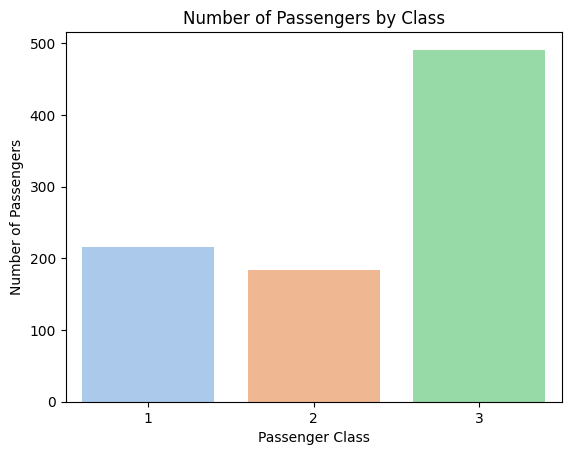

In [598]:
sns.countplot(data=dataset, x='Pclass', palette='pastel')
plt.title('Number of Passengers by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()

<b>Key note:</b> Passenger of class 3 is highest in number while class 2 sits at lowest

Number of passenger based on sex

/tmp/ipython-input-599-3017934545.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Sex', palette='pastel')


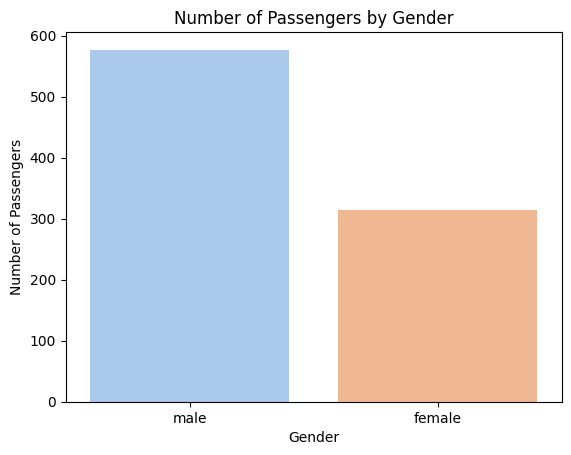

In [599]:
sns.countplot(data=dataset, x='Sex', palette='pastel')
plt.title('Number of Passengers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.show()

<b>Key note:</b> Male passengers were more compared to female passengers

Age distribution of passengers

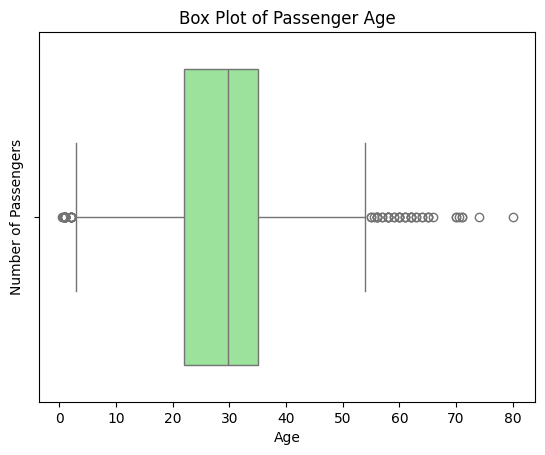

In [600]:
sns.boxplot(data=dataset, x='Age', color='lightgreen')
plt.title('Box Plot of Passenger Age')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

<b>Key note:</b> most people were in the age group of 20-35 with 30 yrs being the mean

Distribution of fare

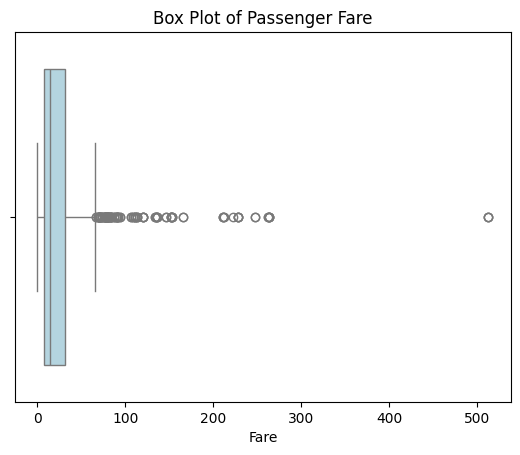

In [601]:
sns.boxplot(data=dataset, x='Fare', color='lightblue')
plt.title('Box Plot of Passenger Fare')
plt.xlabel('Fare')
plt.show()

<b>Key note:</b> most people paid no more than 50 bucks with some outliers going upto 500 bucks. Mostly due to 3 classes and most people boarded class 3 so it's likely the fare should be low compared to class 1 and class 2 leading to such outliers

Passenger count based of Place of Embarktion

/tmp/ipython-input-602-1031751625.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Embarked', palette='pastel')


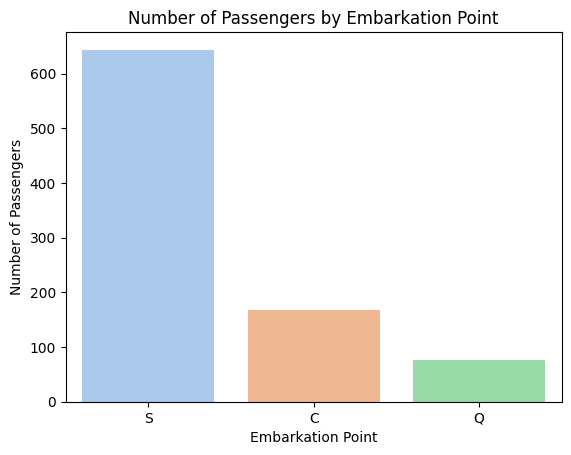

In [602]:
sns.countplot(data=dataset, x='Embarked', palette='pastel')
plt.title('Number of Passengers by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Number of Passengers')
plt.show()

<b>Key note:</b> Most people boarded from Southampton and least from Queentown

Survival rate by Sibling/Spouse

/tmp/ipython-input-603-663558277.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset, x='SibSp', y='Survived', palette='Blues')


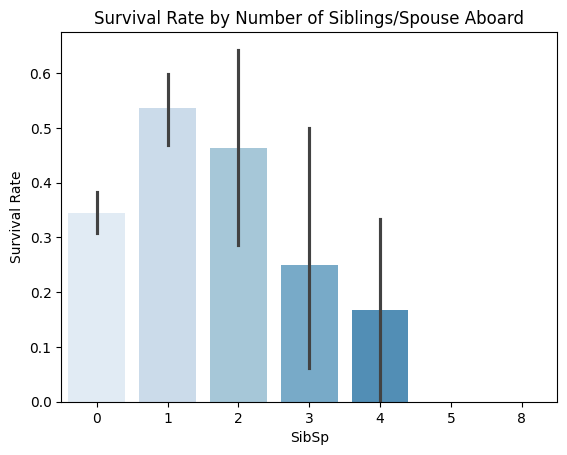

In [603]:
sns.barplot(data=dataset, x='SibSp', y='Survived', palette='Blues')
plt.title('Survival Rate by Number of Siblings/Spouse Aboard')
plt.ylabel('Survival Rate')
plt.show()

<b>Key note:</b> People with 1-2 Sibling/Spouse had higher chance of survival than others with no siblings/spouse having the moderate survival rate

Survival rate by Parents/Children

/tmp/ipython-input-604-1635964047.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset, x='Parch', y='Survived', palette='Greens')


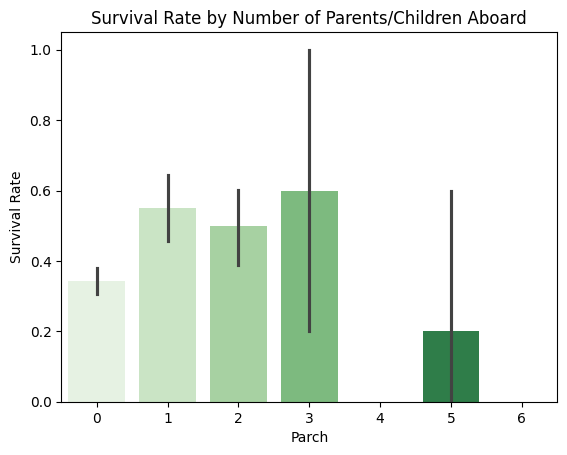

In [604]:
sns.barplot(data=dataset, x='Parch', y='Survived', palette='Greens')
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.ylabel('Survival Rate')
plt.show()

<b>Key note:</b> People boarded with 1-3 children or parents survived more than others

Survival by age

/tmp/ipython-input-605-1565881081.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=dataset, palette='Set2')


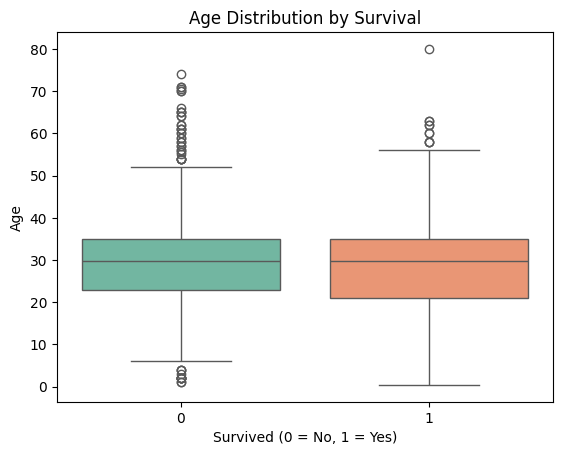

In [605]:
sns.boxplot(x='Survived', y='Age', data=dataset, palette='Set2')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

<b>Key note:</b> There's not much difference in age of people who survived and who not with both being around 30 on average. But slightly younger people were more likely to survive.

Survival by class

/tmp/ipython-input-606-2287777670.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=dataset, palette='Set2')


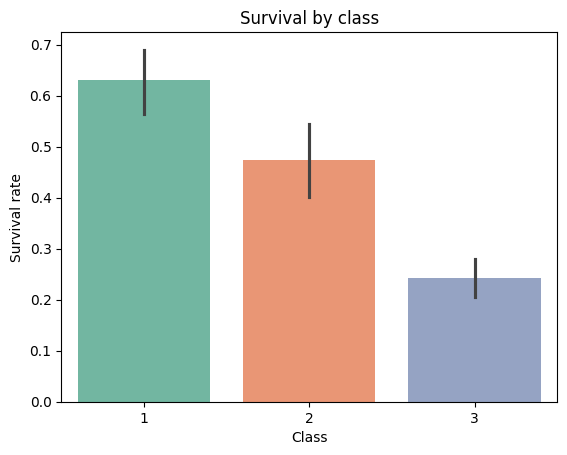

In [606]:
sns.barplot(x='Pclass', y='Survived', data=dataset, palette='Set2')
plt.title('Survival by class')
plt.xlabel('Class')
plt.ylabel('Survival rate')
plt.show()

<b>Key note:</b> People of class 1 were more likely to survive than people with class 3. More likely higher class people were given more priority than lower class people.

Survival by sex

/tmp/ipython-input-607-3225717722.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=dataset, palette='Set2')


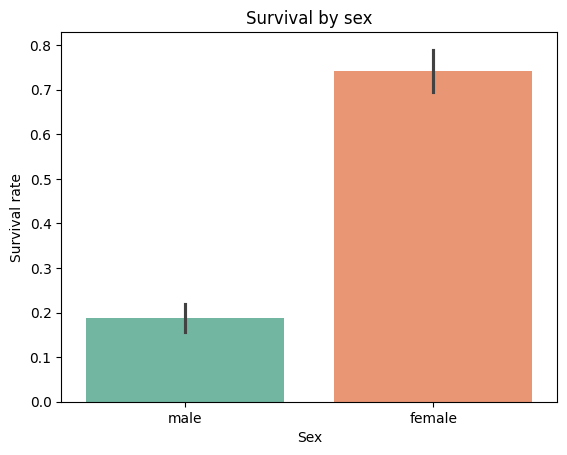

In [607]:
sns.barplot(x='Sex', y='Survived', data=dataset, palette='Set2')
plt.title('Survival by sex')
plt.xlabel('Sex')
plt.ylabel('Survival rate')
plt.show()

<b>Key note:</b> Female passengers survived more than male passengers

Survival by fare

/tmp/ipython-input-608-777542692.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=dataset, palette='Set2')


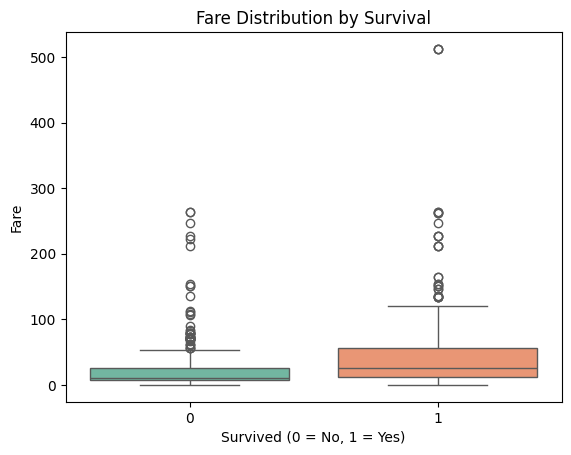

In [608]:
sns.boxplot(x='Survived', y='Fare', data=dataset, palette='Set2')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

<b>Key note:</b> People who paid more survived than people who paid less.

#Dropping unnecessary columns

In [609]:
drop_columns = ['PassengerId','Name', 'Ticket', 'Cabin']

In [610]:
X = dataset.drop(drop_columns, axis=1)
X = X.drop('Survived',axis=1).values
print(X.shape)
y = dataset['Survived'].values
print(y.shape)

(891, 7)
(891,)


In [611]:
print(X)

[[3 'male' 22.0 ... 0 7.25 'S']
 [1 'female' 38.0 ... 0 71.2833 'C']
 [3 'female' 26.0 ... 0 7.925 'S']
 ...
 [3 'female' 29.69911764705882 ... 2 23.45 'S']
 [1 'male' 26.0 ... 0 30.0 'C']
 [3 'male' 32.0 ... 0 7.75 'Q']]


In [612]:
print(y)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

#Encoding the columns

In [613]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,6])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [614]:
print(X)

[[0.0 1.0 0.0 ... 1 0 7.25]
 [1.0 0.0 1.0 ... 1 0 71.2833]
 [1.0 0.0 0.0 ... 0 0 7.925]
 ...
 [1.0 0.0 0.0 ... 1 2 23.45]
 [0.0 1.0 1.0 ... 0 0 30.0]
 [0.0 1.0 0.0 ... 0 0 7.75]]


In [615]:
print(X.shape)

(891, 11)


#Training Logistic regression

In [616]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=500,random_state = 0)
classifier.fit(X, y)

LogisticRegression(max_iter=500, random_state=0)

#Test on training set

In [617]:
print(np.concatenate((classifier.predict(X).reshape(len(X),1), y.reshape(len(y),1)),1))

[[0 0]
 [1 1]
 [1 1]
 ...
 [0 0]
 [1 1]
 [0 0]]


#Predict test set

In [618]:
trainset = pd.read_csv('test.csv')
trainset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [619]:
trainset.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [620]:
X_test = trainset.drop(drop_columns, axis=1)

In [621]:
X_test['Age'] = imputer.fit_transform(X_test[['Age']])
X_test['Fare'] = imputer.fit_transform(X_test[['Fare']])

In [622]:
X_test.isna().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [623]:
X_test = np.array(ct.transform(X_test))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


In [624]:
print(X_test)

[[ 0.      1.      0.     ...  0.      0.      7.8292]
 [ 1.      0.      0.     ...  1.      0.      7.    ]
 [ 0.      1.      0.     ...  0.      0.      9.6875]
 ...
 [ 0.      1.      0.     ...  0.      0.      7.25  ]
 [ 0.      1.      0.     ...  0.      0.      8.05  ]
 [ 0.      1.      1.     ...  1.      1.     22.3583]]


In [625]:
print(X_test.shape)

(418, 11)


#Predicting test set

In [626]:
y_pred = classifier.predict(X_test)

In [630]:
print(y_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [631]:
submission = pd.DataFrame({
    "PassengerId": trainset["PassengerId"],
    "Survived": y_pred
})

In [632]:
submission.to_csv('submission.csv', index=False)